# USAGE EXAMPLE

In [2]:
# LIBRARIES
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from functions import QAA
from datetime import datetime
from scipy.optimize import minimize
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*******************   40%%                      ]  2 of 5 completedc:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hou


Optimal Portfolio Weights for Martingale-inspired QAA using GRADIENT DESCENT optimization:
Ticker
ABBV    0.081508
MET     0.185779
OXY     0.423005
PERI    0.309708
Name: Optimal Weights, dtype: float64

---

Portfolio Return: 0.15%
Benchmark Return (SPY): 0.06%
Risk-Free Rate Return: 0.01%

---

Portfolio Volatility: 2.80%
Benchmark Volatility (SPY): 1.42%
Risk-Free Rate Volatility: 0.00%

---



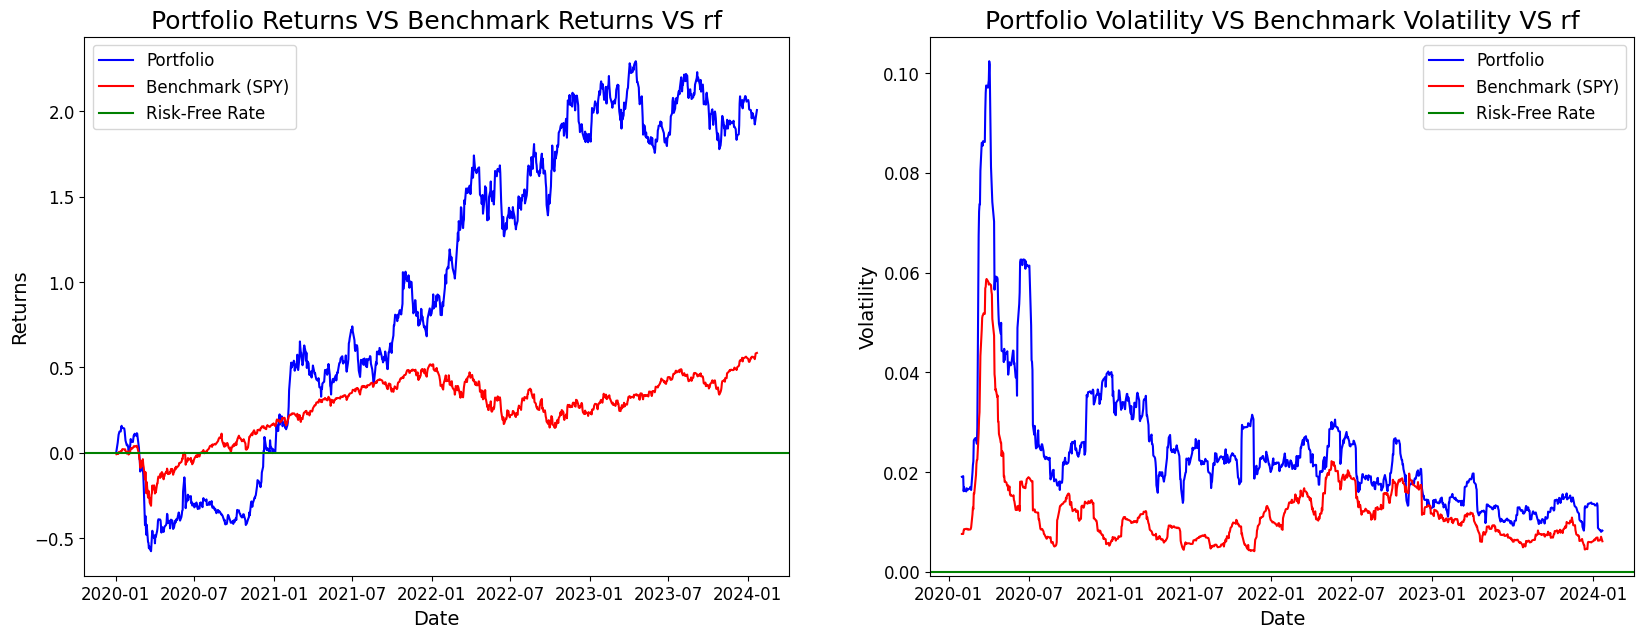

In [3]:
# EXAMPLE
qaa_instance = QAA(
    tickers=["ABBV", "MET", "OXY", "PERI"],
    benchmark="SPY",
    rf=0.02,
    lower_bound=0.10,
    higher_bound=0.90,
    start_date="2020-01-02",
    end_date="2024-01-23",
    expected_returns=np.array([.15, .1, .1, .1]),
    opinions=np.array([[1, 0, 0, 0], [0, 1, -3, 0], [0, 0, 1, -1], [0, 0, 0, 0]]),
    MAR=0.2,
    optimization_model="SLSQP",
    #optimization_model="MONTECARLO",
    #optimization_model="GRADIENT DESCENT",
    QAA_strategy="HRP",
    #QAA_strategy="MAX SHARPE RATIO",
    #QAA_strategy="OMEGA",
    #QAA_strategy="SEMIVARIANCE",
    #QAA_strategy="SORTINO RATIO",
    #QAA_strategy="BLACK LITTERMAN",
    #QAA_strategy="HRP",
    #QAA_strategy="ROY SAFETY FIRST RATIO",
    #QAA_strategy="MARTINGALE"
    #QAA_strategy="MIN VARIANCE"
    #QAA_strategy=""
)

try:
    data, returns, std, var, cov, corr = qaa_instance.assets_metrics()

    optimal_weights = qaa_instance.QAA_strategy_selection(returns=returns)

    qaa_instance.portfolio_metrics(returns)

except ValueError as ve:
    print(f"Error: {str(ve)}")